#  Lab 1: Grade Point Average Prediction

## 1.A: Data, Models and Decisions

In this Lab we are tasked with designing a system to make admission decisions at the University of Pennsylvania (Penn). In order to design this system we need to specify requirements, acquire data and create a model to substantiate our decisions. 

## Environment setup

We will first import the necessary Python Packages. We will use Numpy to load the data, pytorch to process it and matplotlib to plot and visualize results.

In [1]:
# Import libraries used for this lab
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
torch.set_default_dtype(torch.float64)
# Set plotting default parameters
plt.style.use('default')
plt.rcParams['font.size'] = '14'

## Data 

For a collection of former students we have access to their high school (HS) grade point average (GPA), their Scholastic Assessment Test (SAT) scores, their gender and their Penn GPA. 

Figure 4 shows plots in which the horizontal axes are high school GPAs or SAT scores and the vertical axes are Penn GPAs. These plots show that high school GPA is predictive of Penn GPA. Although there is significant variation we can see that higher high school GPA corresponds with higher Penn GPA. This indicates that high school GPAs are useful information for admission decisions as they can predict with some accuracy the GPA that an admitted student may attain at Penn. We can squint and see that the same is more or less true of SAT scores, although the correlation between SAT scores and Penn GPA is weaker. 

**Task 1**    Load the GPA and SAT score data from https://dsd.seas.upenn.edu/wp-content/uploads/2023/01/Lab1_DSD-1.zip. Reproduce the plots in Figure 4. 

### Data Loading

In [2]:
# We will use numpy.genfromtxt to load the CSV into a numpy array
# And then convert it to a pytorch tensor
data = torch.from_numpy( np.genfromtxt ('data.csv', delimiter=",", skip_header=1, dtype = float ) )

print(f"Number of students: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}")
print(f"\nExample student: \nHigh-school GPA: {data[0, 0]} \t SAT score: {data[0, 1]}\t Penn GPA: {data[0, 2]}\t Female {data[0, 3]}\t Male {data[0, 4]}")

Number of students: 600
Number of variables: 5

Example student: 
High-school GPA: 3.79 	 SAT score: 1540.0	 Penn GPA: 3.53	 Female 0.0	 Male 1.0


### Correlation Analysis

In [3]:
# We will store each column in a variable
high_school_gpa = data[:,0]
sat_scores = data[:,1]
penn_gpa = data[:,2]

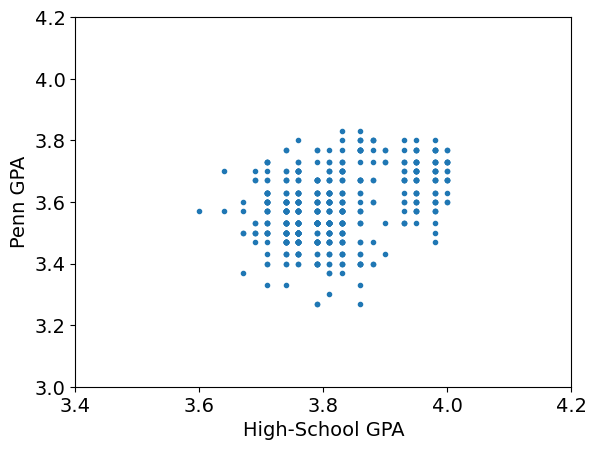

In [4]:
# Plot the data
plt.plot(high_school_gpa, penn_gpa, ".")

# Adjust axis
plt.xlim([3.4, 4.2])
plt.ylim([3, 4.2])

# Label axes
plt.xlabel("High-School GPA")
plt.ylabel("Penn GPA")
plt.savefig("HSGPAvsPennGPA.pdf")

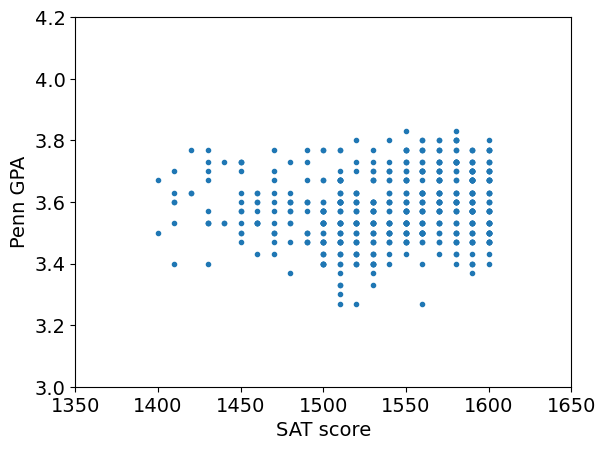

In [5]:
plt.plot(sat_scores, penn_gpa, ".")
plt.xlim([1350, 1650])
plt.ylim([3, 4.2])
plt.xlabel("SAT score")
plt.ylabel("Penn GPA")
plt.savefig("SATvsPennGPA.pdf")

## 

## Models

To make admission decisions we build the model of Penn shown in Figure 5. This model takes as inputs high school GPA, SAT scores and gender information of a student and produces as an output the Penn GPA of the corresponding graduate. If we define the input data as a vector $x = [\text{HS GPA}; \text{SAT}; \text{Gender}]$ and we denote the output as $y = \text{Penn GPA}$ we can represent this model as the function,

\begin{equation}
 \text{Penn GPA} 
    ~=~ y 
    ~=~ P(x) 
    ~=~ P \left[ 
             \begin{array}{l} 
                \text{HS GPA} \\ 
                \text{SAT}    \\ 
                \text{Gender}
             \end{array}
          \right] \ .
\end{equation}

## Decisions

To make admission decisions we leverage the model and data from the previous sections.

To make matters simpler let us begin by ignoring SAT scores and gender and attempt predictions based on high school GPAs. This means that the model in (1) is replaced by the model

\begin{equation}\tag{2}
 \text{Penn GPA} 
    ~=~ y 
    ~=~ P(x) 
    ~=~ P ( \, \text{HS GPA} \, ) .
\end{equation}

The function $P(x)$ is the true effect of Penn on scholastic accomplishment. This is information that becomes available after the fact. When a student graduates Penn, we have access to their high school GPA $x$ and their Penn GPA $y$. 

Penn GPA predictions are to be made prior the fact. Before a student attends Penn we want to estimate their Penn GPA based on their high school GPA $x$. We *choose* to postulate a linear relationship and make predictions of the form

\begin{equation}\tag{3}
   \hat{y} = \alpha x.
\end{equation}

In (3), $\hat{y}$ is a *prediction* of the *true* Penn GPA $y$ that will be available after the fact. The coefficient $\alpha$ is to be determined with the goal of making predictions $\hat{y}$ close to to actual Penn GPA $y$.


### Least Squares Estimation

To determine a proper value for the coefficient $\alpha$ in (3) we utilize the data we have available on the scholastic performance of past students. Use $N$ to denote the total number of available data points. Introduce a subindex $i$ to differentiate past students so that the pair $(x_i, y_i)$ denotes the high school GPA and Penn GPA os student $i$. For these students we can make GPA *predictions* $\hat{y}_i = \alpha x_i$. For a given coefficient $\alpha$ we define the mean squared error (MSE),

\begin{equation}\tag{4}   
   \text{MSE}(\alpha) 
      ~=~ \frac{1}{N} 
             \sum_{i=1}^{N} \Big( y_i - \hat{y}_i \Big)^2
      ~=~ \frac{1}{N} 
             \sum_{i=1}^{N} \Big( y_i - \alpha x_i \Big)^2 .
\end{equation}

The mean squared error $\text{MSE}(\alpha)$ measures the predictive power of coefficient $\alpha$. The quantity $( y_i - \hat{y}_i )^2$ is always nonnegative and indicates good the predicted GPA $\hat{y}_i$ is to the true GPA $y_i$. The MSE averages this metric over all students. It follows that a natural choice for $\alpha$ is the value that makes the MSE smallest. We therefore define the optimal coefficient

\begin{equation}\tag{5}   
   \alpha^* 
      ~=~ \text{argmin}_\alpha \frac{1}{2} 
             \text{MSE}(\alpha) 
      ~=~ \text{argmin}_\alpha \frac{1}{2N} 
             \sum_{i=1}^{N} \Big( y_i - \alpha x_i \Big)^2 ,
\end{equation}

and proceed to make Penn GPA predictions as $\hat{y} = \alpha^* x$. This GPA predictor is called the linear minimum mean squared error (MMSE) prediction. This is because the predictor is the linear function that minimizes the MSE. 

**Task 2.1 Prove that the MMSE estimator coefficient $\alpha^*$ defined in (5) is given by the expression**

\begin{equation}\tag{6}   
   \alpha^* 
      = \sum_{i=1}^{N} x_i y_i ~\bigg/~
        \sum_{i=1}^{N} x_i^2 .
\end{equation}

Compute $\alpha^*$ for the data loaded in Task 1. Plot the Penn GPA with respect to HS GPA and superimpose the prediction line $\hat{y} = \alpha^* x$.

In [6]:
# Unsqueeze turns a vector of dimension N to a vector of dimension (N, 1) so that we can transpose it.
x = high_school_gpa.unsqueeze(1)
y = penn_gpa

In [7]:
# Simple computation of alpha with a for loop
numerator = 0
denominator = 0
for i in range(len(x)):
    numerator += x[i]*y[i]
    denominator += x[i]**2
alpha = numerator/denominator
print(f"alpha = {alpha[0]:.3f}")

alpha = 0.938


In [8]:
# A@B computes matrix multiplication, .T trasposes a tensor
# a**(-1) is a^-1 (elementwise inverse, not matrix inverse)
alpha = (x.T@x)**(-1)*x.T@y
print(f"Optimal predictor in the mean squared error sense: \nPredicted Penn GPA = {alpha.item():.3f} * High-School GPA ")

Optimal predictor in the mean squared error sense: 
Predicted Penn GPA = 0.938 * High-School GPA 


In [9]:
y_pred = x*alpha

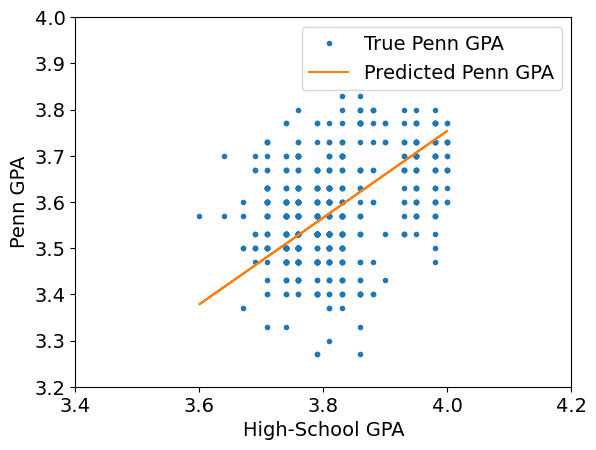

In [10]:
plt.plot(high_school_gpa, penn_gpa, '.', label = "True Penn GPA")
plt.plot(high_school_gpa, y_pred, label = "Predicted Penn GPA")
plt.legend()

# Adjust axis
plt.xlim([3.4, 4.2])
plt.ylim([3.2, 4])

# Label axes
plt.xlabel("High-School GPA")
plt.ylabel("Penn GPA")
plt.savefig("linear_model_HSGPA.pdf")

We evaluate the merit of $\alpha^*$ with the root mean squared error (RMSE)

\begin{equation}\tag{7}   
   \text{MSE}(\alpha) 
      ~=~ \sqrt { \text{MSE}(\alpha) }
      ~=~ \Bigg [\, 
             \frac{1}{N} 
                \sum_{i=1}^{N} \Big( y_i - \alpha x_i \Big)^2 \,
          \Bigg]^{1/2}.
\end{equation}

**Task 2.2** Compute the RMSE of $\alpha^*$ and comment on the quality of the Penn GPA predictions.

In [11]:
# compute squared difference between each prediction (y_i-ypred_i)^2
# y = x**2 returns a tensor with where each element is y_i = (x_i)^2
squared_error = (y-y_pred.squeeze())**2
# average over all elements (students)
mean_squared_error = torch.mean(squared_error)
# compute its square root
r_mean_squared_error = torch.sqrt(mean_squared_error)
print(f"The root mean squared error is: {r_mean_squared_error:.3f}")

The root mean squared error is: 0.105


In Task 2.2 we make predictions of the Penn GPA of students that have graduated Penn.
Predicting Penn GPAs of past students is unnecessary given that we already know their true GPAs. 
Our motivation for solving this unnecessary problem is to determine the coefficient $\alpha^*$ that we can use to make predictions $\hat{y} = \alpha^* x$ of students that have not yet attended Penn -- for which $x$ is available but $y$ is not.
The effectiveness of this prediction depends on the extent to which the past is a good representation of the future.  

It is germane to emphasize that in Task 2.2 we are using something we know -- the GPA of former students -- to answer a new question -- the GPA of a prospective student.
However primitive, this is a form of intelligence.

## Linear Regression

We consider now a more complete model in which the Penn GPA is deemed to depend on the high school GPA and the SAT score. We therefore define the input vector  $x = [x_1; x_2] = [\text{HS GPA}; \text{SAT}; \text{Gender}]$ 

\begin{equation}\tag{8}
 \text{Penn GPA} 
    ~=~ y 
    ~=~ P(x) 
    ~=~ P \left[ 
             \begin{array}{l} 
                x_1 \\ 
                x_2 \\ 
             \end{array}
          \right] \ .
    ~=~ P \left[ 
             \begin{array}{l} 
                \text{HS GPA} \\ 
                \text{SAT}    \\ 
             \end{array}
          \right] \ .
\end{equation}

To make Penn GPA predictions we postulate an input-output relationship of the form

\begin{equation}\tag{9}
   \hat{y} 
      ~=~ w_1 x_1 + w_2 x_2
      ~=~ w^T x .
\end{equation}

As is the case of (3),  $\hat{y}$ in (9) is a *prediction* of the *true* Penn GPA $y$ that will be available after the fact. The coefficient $w=[w_1; w_2]$ is to be determined with the goal of making predictions $\hat{y}$ close to to actual Penn GPA $y$.

**Task 3** Define and compute the MMSE estimator coefficients $w^*$, that would extend the MMSE definition in (5). Show that this coefficient is given by the expression

\begin{equation}\tag{10}  
   w^* 
      = \Bigg[ \sum_{i=1}^{N} x_i x_i^T \Bigg]^{-1} 
        \sum_{i=1}^{N} x_i y_i 
         .
\end{equation}

Compute $w^*$ for the data loaded in Task 1. Compute the RMSE of $w^*$ and comment on the quality of the Penn GPA predictions.

In [12]:
# We use both HS GPA and SAT scores
x = data[:,:2] 
y = penn_gpa
#  torch.linalg.inv computes matrix inverse
w = torch.linalg.inv(x.T@x)@x.T@y
print(f"Optimal predictor: \nPredicted Penn GPA = {w[0].item():.4f} * High-School GPA + {w[1].item():.4f} * SAT score")

Optimal predictor: 
Predicted Penn GPA = 0.7144 * High-School GPA + 0.0006 * SAT score


In [13]:
# compute predictions with optimal w
y_pred = x@w
# calculate its RMSE
mean_squared_error = torch.mean((y-y_pred)**2)
root_mean_squared_error = torch.sqrt(mean_squared_error)
print(f"The root mean squared error is: {root_mean_squared_error:.3f}")

The root mean squared error is: 0.100
